# Monstrinho 5: Forma, função e ativação

**Objetivo:**  implemente 3 novas funções de ativação na rede neural feita em Python puro nos vídeos da disciplina. Escreva brevemente sobre estas 3 funções de ativação, mostrando a equação delas e comentando a diferença com relação à função de ativação sigmoidal. Mostre que seu código funciona rodando alguns testes simples.

**Comentário:**  aqui não é o lugar de inventar funções de ativação. Busque por funções de ativação já existentes utilizadas em redes neurais.

**Comentário 2:**  observe que o enunciado diz claramente que é para realizar a tarefa na rede neural feita em Python puro nos vídeos da disciplina. Se você está usando o ``PyTorch``, ``numpy``, ``tensorflow``, ``keras``, ``lightning`` ou qualquer outra biblioteca pronta, você está no caminho errado!


**Resolução:**

Nossa rede neural implementada em python puro tem como base a classe `Valor` (aqui chamada de `Value`). Dessa forma, as funções de ativação devem ser aplicadas nessa classe. Para facilitar a visualização, vou primeiro definí-las como funções, e depois os métodos serão definidos internamente à classe base.

Como nossa função base de ativação está sendo a função sigmoidal, ela será a base comparativa para as demais. Na próxima célula, farei importações relevantes, criarei uma lista de valores $x$ para comparação e uma função sigmoidal.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Valores de x para gráfico de comparação
x = np.linspace(-5, 5, 1000)

# Definindo a sigmóide que será plotada como referência
def sigmoid(x):
    return (math.exp(x)) / (math.exp(x) + 1)

y_sig = [sigmoid(a) for a in x]

A primeira função de ativação é a ReLU (*Rectified Linear Unit*, ou Unidade Linear Retificada em tradução livre). É uma das funções não lineares mais usadas entre pesquisadores de *deep learning*, e sua popularidade se deve principalmente à sua simplicidade e capacidade superior de treinamento frente à funções como a sigmoide logística [[1]](https://www.researchgate.net/profile/Fouzia-Adjailia-2/publication/341953192_A_Review_of_Activation_Function_for_Artificial_Neural_Network/links/668a6a23714e0b03154b8f8c/A-Review-of-Activation-Function-for-Artificial-Neural-Network.pdf). A ReLU também é interessante por modelar de maneira simples o funcionamento de neurônios reais, conseguindo emular a esparsidade visível nestes, que apresenta vantagens matemáticas (a eficiência de representações esparsas é exponencialmente maior do que a de representações densas pelo número de atributos não nulos) [[2]](https://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf). É definida como:

$$
ReLU(x) = max(0,x)
$$

Ou seja, é 0 para valores negativos ou nulos e identidade para valores positivos. Isso garante a derivada 1 para todos os valores positivos, de maneira a simplificar o gradiente. Por outro lado, um dos problemas que essa função encontra é a morte prematura de neurônios com valores negativos, que raramente se recuperam uma vez anulados, e a não diferenciabilidade em 0 (o que é ignorado em sua aplicação, estabelecendo a derivada como 0).

Podemos verificar o comportamento da ReLU a partir de um gráfico, comparando-a com a função sigmoidal. A definição da função e o gráfico estão abaixo.

In [2]:
def ReLU(x):
    return max(0, x)

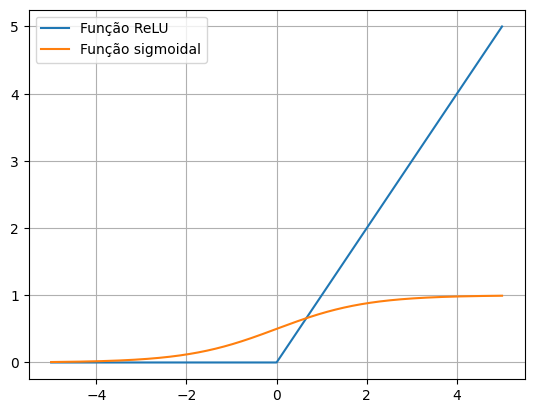

In [3]:
y_relu = [ReLU(a) for a in x]

plt.plot(x, y_relu, label='Função ReLU')
plt.plot(x, y_sig, label='Função sigmoidal')
plt.grid(True)
plt.legend()
plt.show();

Perceba que o comportamento das funções é radicalmente diferente. Enquanto a função sigmoidal se mantém entre os valores de 0 e 1 centrados na origem, a ReLU apresenta um bico em 0, adotando valores cada vez maiores.

A segunda função escolhida é a função *softplus*, que é uma versão suavizada da ReLU, no sentido de que não há o bico da função em 0. Essa suavização garante sua diferenciabilidade em todos os pontos, mas, apesar do que seria intuitivo, não garante a melhor performance, provavelmente por não garantir *hard zeros* e não representar zeros reais [[2]](https://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf). A função é representada por:

$$
softplus(x) = log(1 + e^x)
$$

Perceba que, quando $x$ tende ao infinito negativo, a exponencial tende a zero, o que torna a função logarítmica também tende a zero (como a ReLU). No infinito positivo, a exponencial é muito maior que um, o que torna o logaritmo próximo a x (também similar a ReLU). Nas proximidades de 0, a função tende a $ln(2)$, que é um pouco menor que um, e mantém-se diferenciável [[3]](https://en.wikipedia.org/wiki/Softplus).

Podemos verificar o comportamento da *softmax* a partir de um gráfico, comparando-a com a função sigmoidal e a ReLU. A definição da função e o gráfico estão abaixo:

In [4]:
def softplus(x):
    return math.log((1 + math.exp(x)))

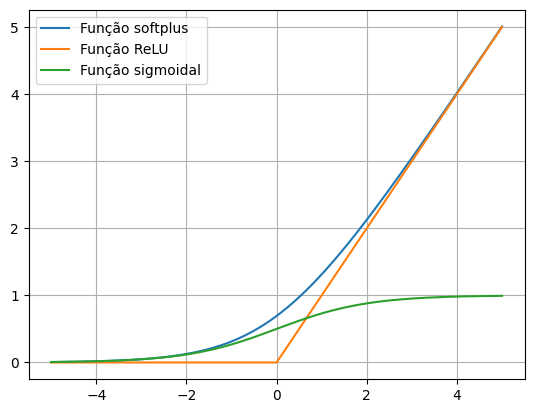

In [5]:
y_softplus = [softplus(a) for a in x]

plt.plot(x, y_softplus, label='Função softplus')
plt.plot(x, y_relu, label='Função ReLU')
plt.plot(x, y_sig, label='Função sigmoidal')
plt.grid(True)
plt.legend()
plt.show();

Perceba que as funções softplus e ReLU apresentam comportamentos similares, e que ambas aumentam quase linearmente para os números maiores que zero.

A terceira e última função é a *SWISH*, uma função não linear e não monotônica proposta pelo artigo [[4]](https://arxiv.org/pdf/1710.05941). Essa função foi achada a partir de métodos computacionais de busca, e tem uma componente sigmoidal, como pode ser visualizado a seguir:

$$
swish(x, \beta) = x * (\frac{1}{1+ e^{-\beta x}})
$$

O termo $\beta$ pode ser uma constante definida (como será utilizado nessa aplicação) ou um parâmetro treinável que pode ser descoberto pela própria rede, uma vez que a função é diferenciável em todos os pontos. Quando esse termo é 1, a função é equivalente à *Sigmoid-weighted Linear Unit* (SiL, ou unidade linear com peso sigmoidal, em tradução livre), enquanto que zerar esse argumento torna a função linear: $swish(x, \beta = 0) = \frac{x}{2}$. Quando $\beta$ tende a infinito, a componente sigmoidal se aproxima de uma função binária (0-1), e *swish* se aproxima da ReLU. O artigo referência alega que essa função performa melhor no treinamento de redes neurais que ReLU, *softplus* e sigmoidal.

Abaixo, plotaremos o gráfico para alguns valores de $\beta$, comparando as funções entre si e uma delas com a sigmoidal e a ReLU.

In [6]:
def swish(x, beta=1):
    return x * (1/(1 + math.exp((-beta) * x)))

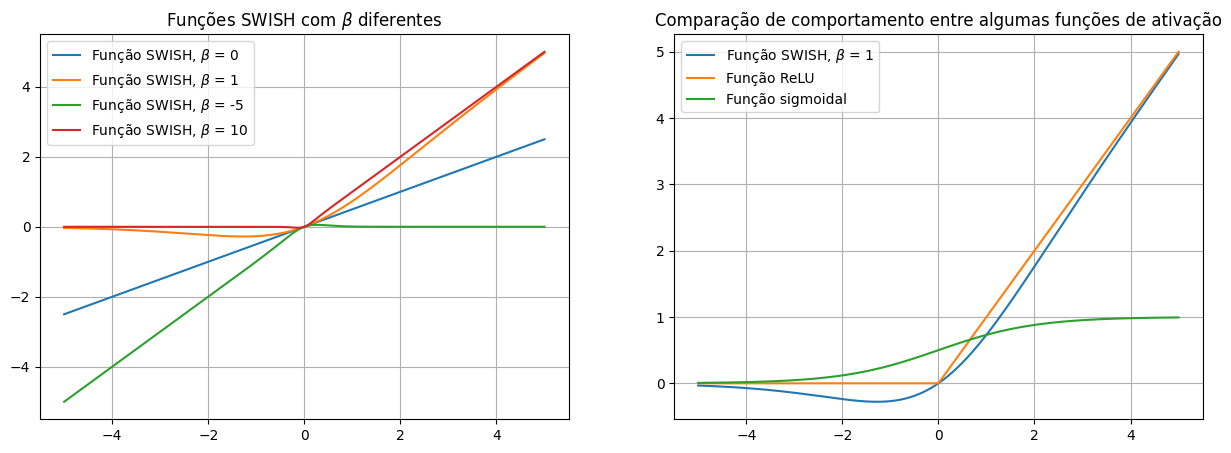

In [7]:
y_swish0 = [swish(a, beta=0) for a in x]
y_swish1 = [swish(a) for a in x]
y_swish5 = [swish(a, beta=-5) for a in x]
y_swish10 = [swish(a, beta=10) for a in x]


fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(x, y_swish0, label=r'Função SWISH, $\beta$ = 0')
ax[0].plot(x, y_swish1, label=r'Função SWISH, $\beta$ = 1')
ax[0].plot(x, y_swish5, label=r'Função SWISH, $\beta$ = -5')
ax[0].plot(x, y_swish10, label=r'Função SWISH, $\beta$ = 10')
ax[0].set(title = r'Funções SWISH com $\beta$ diferentes')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(x, y_swish1, label=r'Função SWISH, $\beta$ = 1')
ax[1].plot(x, y_relu, label='Função ReLU')
ax[1].plot(x, y_sig, label='Função sigmoidal')
ax[1].set(title = r'Comparação de comportamento entre algumas funções de ativação')
ax[1].legend()
ax[1].grid(True)

plt.show();

Como é possível verificar na figura à esquerda, a função *SWISH* pode adotar comportamentos diferentes a partir da mudança do $\beta$: além do que foi comentado anteriormente, a escolha de um termo negativo ativa os neurônios apenas com valores negativos. Em relação às funções ReLU e sigmoidal, a função *SWISH* com $\beta = 1$ mantém a ativação na região próxima a zero, próxima à função sigmoidal, mas a partir do crescimento de $x$ há a proximidade cada vez maior com o comportamento da ReLU.

Entendidas as funções de ativação, podemos aplicar em nossa classe e verificar seu funcionamento na rede. Teremos que implementar uma função de logaritmo para garantir a propagação de gradiente.

In [ ]:
import math

class Value:
    def __init__(self, data, parents=(), parent_operator='', label=''):
        if isinstance(data, Value):
            self.data = data.data
        else:
            self.data = data
        self.parents = parents
        self.parent_operator = parent_operator
        self.label = label
        self.grad = 0
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other_value):
        """self + other_value"""

        if not isinstance(other_value, Value):
            other_value = Value(other_value)
            
        parent_operator = "+"
        parents = (self, other_value)
        data = self.data + other_value.data

        result = Value(data, parents, parent_operator)

        def propagate_add():
            self.grad += result.grad * 1 # grad filho * derivada filho em relação a mãe
            other_value.grad += result.grad * 1
        
        result.propagate = propagate_add # sobrescreve a função de propagar do vértice filho

        return result
    
    def __radd__(self, other_value):
        """other_value + self"""

        return self + other_value
    
    def __sub__(self, other_value):
        """self - other_value"""
        return self + (- other_value)
    
    def __rsub__(self, other_value):
        return other_value + (-self)

    def __mul__(self, other_value):
        """self * other_val"""
        
        if not isinstance(other_value, Value):
            other_value = Value(other_value)

        parent_operator = "*"
        parents = (self, other_value)
        data = self.data * other_value.data

        result = Value(data, parents, parent_operator)

        def propagate_mul():
            self.grad += result.grad * other_value.data # grad filho * derivada filho em rel. mae
            other_value.grad += result.grad * self.data
        
        result.propagate = propagate_mul
        
        return result
    
    def __rmul__(self, other_value):
        """other_val * self"""
        return self * other_value
    
    def __pow__(self, exponential):
        """self ** expoente"""

        # certificando-se que o expoente é um inteiro ou float
        assert isinstance(exponential, (int, float))

        parent_operator = f"**{exponential}"
        parents = (self, )
        data = self.data ** exponential

        result = Value(data, parents, parent_operator)

        def propagate_pow():
            self.grad += result.grad * (exponential * self.data ** (exponential - 1))

        result.propagate = propagate_pow
    
        return result
    
    def __truediv__(self, other_value):
        """self / other_value"""

        return self * (other_value ** (-1))
    
    def __rtruediv__(self, other_value):
        return self / other_value

    def __neg__(self):
        """ - self """
        return self * (-1)
    
    def exp(self, d = None):
        """exp(self)"""

        if d == None:
            d = self

        if not isinstance(d, Value):
            d = Value(d)

        parent_operator = "exp"
        parent = (self, )
        try:
            data = math.exp(d.data)
        except OverflowError:
            print("Erro de Overflow!")
            data = float("inf")
            
        result = Value(data, parent, parent_operator)

        def propagate_exp():
            self.grad += result.grad * data # gradiente filho * derivada filho em rel. mae
        
        result.propagate = propagate_exp

        return result
    
    def sig(self):
        """exp(self) / (exp(self) + 1)"""

        return self.exp() / (self.exp() + 1)
    
    def relu(self):
        """max(0, self)"""

        parent_operator = "relu"
        parent = (self, )
        data = max(0, self.data)
        result = Value(data, parent, parent_operator)

        def propagate_relu():
            self.grad += (1.0 if self.data > 0 else 0.0) * result.grad
        
        result.propagate = propagate_relu
        return result
    
    def log(self, d, base=math.e):
        """log(self)"""

        if not isinstance(d, Value):
            d = Value(d)

        # certificando-se que a base é um inteiro ou float positivo
        assert isinstance(base, (int, float))
        assert base > 0

        parent_operator = f"log{base}"
        parents = (self, )
        data = math.log(d.data, base)

        result = Value(data, parents, parent_operator)

        def propagate_log():
            if data == 0:
                self.grad = 0
            else:
                self.grad += result.grad * ((data * math.log(base)) ** (-1)) # gradiente filho * derivada filho em rel. mae
        
        result.propagate = propagate_log

        return result

    def softplus(self):
        """ln(1 + exp(self))"""
        
        return self.log((1 + self.exp()))
    
    def swish(self, beta=1):
        """self * (1 + exp(-beta * self))^-1"""

        assert isinstance(beta, (int, float))

        return self * (1 + (1 / self.exp(((-beta) * self.data)))) 

    def propagate(self):
        pass

    def propagate_all(self):
        """Propagação que só pode ser feita a partir do vértice folha."""
        self.grad = 1
        
        # Busca em profundidade
        topological_order = []
        visited = set()
        def build_top_order(v):
            if v not in visited:
                visited.add(v)
                for parent in v.parents:
                    build_top_order(parent)
                topological_order.append(v)
        
        build_top_order(self)
        
        for v in reversed(topological_order):
            v.propagate()

In [9]:
import random

class Neuronio:
    def __init__(self, num_dados_entrada):
        self.vies = Value(random.uniform(-1,1))

        self.pesos = []
        for _ in range(num_dados_entrada):
            self.pesos.append(Value(random.uniform(-1,1)))
    
    def __call__(self, x, tipo_ativacao='sig'):
        # calcula o dado de saída

        assert len(x) == len(self.pesos) # evita erros posteriores

        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno

        soma += self.vies

        if tipo_ativacao == 'sig':
            dado_de_saida = soma.sig()
        elif tipo_ativacao == 'relu':
            dado_de_saida = soma.relu()
        elif tipo_ativacao == 'softplus':
            dado_de_saida = soma.softplus()
        elif tipo_ativacao == 'swish':
            dado_de_saida = soma.swish()
        else:
            dado_de_saida = soma

        return dado_de_saida
    
    def parametros(self):
        return self.pesos + [self.vies]

class Camada:
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x, tipo_ativacao='sig'):
        dados_de_saida = []

        for neuronio in self.neuronios:
            informacao = neuronio(x, tipo_ativacao)
            dados_de_saida.append(informacao)
        
        if len(dados_de_saida) == 1:
            return dados_de_saida[0] # garante que o valor retornado seja um número caso estejamos na output layer
        else:
            return dados_de_saida # para hidden layers
    
    def parametros(self):
        params = []

        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio) # concatena listas

        return params


class MLP:
    def __init__(self, num_dados_entrada: int, num_neuronios_por_camada: list):
        
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        # estamos criando apenas a partir da primeira camada escondida
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
        
        self.camadas = camadas
    
    def __call__(self, x, tipo_ativacao='sig'):
        
        for camada in self.camadas:
            x = camada(x, tipo_ativacao) # transforma x a cada camada chamada

        return x # retorna apenas um valor, representando apenas o output
    
    def parametros(self):
        params = []

        for camada in self.camadas:
            params_camada = camada.parametros()
            params.extend(params_camada) # concatena listas

        return params

Vamos testar a rede com diferentes funções de ativação. O primeiro passo é definir nossos dados sintéticos.

In [10]:
# Dados de teste
x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

Perceba que, como definimos que a função de ativação será definida ao chamar a função (no dunder ``__call__``), o valor de viés e pesos inicial dos neurônios deve ser o mesmo. Testaremos as previsões com diversas funções de ativação e verificaremos o erro de cada.

In [11]:
# Definição da arquitetura inicial da rede
NUM_DADOS_ENTRADA = 3
NUM_DADOS_SAIDA = 1
CAMADAS_OCULTAS = [3,2]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_SAIDA]

mlp_teste = MLP(NUM_DADOS_ENTRADA, arquitetura_da_rede)

# Rede neural com tipo de ativação sigmoidal
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 0.01
loss_data = []

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for exemplo in x:
        previsao = mlp_teste(exemplo)
        y_pred.append(previsao)

    # loss
    erros = []
    for yt, yp in zip(y_true, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad
    for p in mlp_teste.parametros():
        p.grad = 0

    # backpropagation
    loss.propagate_all()

    # atualiza parâmetros
    for p in mlp_teste.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    loss_data.append(loss.data)

# mostrar resultado
print(loss_data[:5], loss_data[-1])

[0.5541397937165589, 0.5540057819840468, 0.55387337564021, 0.5537425484971779, 0.5536132747901883] 0.5411604665391525


In [12]:
# Definição da arquitetura inicial da rede
NUM_DADOS_ENTRADA = 3
NUM_DADOS_SAIDA = 1
CAMADAS_OCULTAS = [3,2]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_SAIDA]

mlp_teste = MLP(NUM_DADOS_ENTRADA, arquitetura_da_rede)

# Rede neural com tipo de ativação ReLU
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 0.001
loss_data = []

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for exemplo in x:
        previsao = mlp_teste(exemplo, tipo_ativacao="relu")
        y_pred.append(previsao)

    # loss
    erros = []
    for yt, yp in zip(y_true, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad
    for p in mlp_teste.parametros():
        p.grad = 0

    # backpropagation
    loss.propagate_all()

    # atualiza parâmetros
    for p in mlp_teste.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO
    
    # mostra resultado (opcional)
    loss_data.append(loss.data)

# mostrar resultado
print(loss_data[:5], loss_data[-1])

[0.5808753928632902, 0.5765040444797764, 0.5722178027362761, 0.568015082297254, 0.5638943249392624] 0.36184989543421675


In [13]:
# Definição da arquitetura inicial da rede
NUM_DADOS_ENTRADA = 3
NUM_DADOS_SAIDA = 1
CAMADAS_OCULTAS = [3,2]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_SAIDA]

mlp_teste = MLP(NUM_DADOS_ENTRADA, arquitetura_da_rede)

# Rede neural com tipo de ativação softplus
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 0.01
loss_data = []

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for exemplo in x:
        previsao = mlp_teste(exemplo, tipo_ativacao="softplus")
        y_pred.append(previsao)

    # loss
    erros = []
    for yt, yp in zip(y_true, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad
    for p in mlp_teste.parametros():
        p.grad = 0

    # backpropagation
    loss.propagate_all()

    # atualiza parâmetros
    for p in mlp_teste.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO
    
    # mostra resultado (opcional)
    loss_data.append(loss.data)

# mostrar resultado
print(loss_data[:5], loss_data[-1])

[7.905184688110472, 5.632487738086501, 4.169627145318785, 3.166970679752472, 2.438818787549504] 0.5675


In [14]:
# Definição da arquitetura inicial da rede
NUM_DADOS_ENTRADA = 3
NUM_DADOS_SAIDA = 1
CAMADAS_OCULTAS = [3,2]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_SAIDA]

mlp_teste = MLP(NUM_DADOS_ENTRADA, arquitetura_da_rede)

# Rede neural com tipo de ativação swish
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 0.01
loss_data = []

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for exemplo in x:
        previsao = mlp_teste(exemplo, tipo_ativacao="swish")
        y_pred.append(previsao)

    # loss
    erros = []
    for yt, yp in zip(y_true, y_pred):
        residuo = yp - yt
        try:
            erro_quadratico = residuo ** 2
        except OverflowError:
            print("Erro de Overflow!")
            erro_quadratico = float("inf")
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad
    for p in mlp_teste.parametros():
        p.grad = 0

    # backpropagation
    loss.propagate_all()

    # atualiza parâmetros
    for p in mlp_teste.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO
    
    # mostra resultado (opcional)
    loss_data.append(loss.data)

# mostrar resultado
print(loss_data[:5], loss_data[-1])

Erro de Overflow!
Erro de Overflow!
Erro de Overflow!
Erro de Overflow!
[6.224448051635032e+48, inf, nan, nan, nan] nan


**Conclusões e aprendizado:**
É perceptível que as funções swish e softplus apresentaram problemas no cálculo dos gradientes, provavelmente fruto dos erros de *OverFlow* sinalizados no código, ocorridos por números muito grandes ou muito pequenos na função exponencial ou no logaritmo. A função ReLU apresentou um comportamento estável, mas outras rodagens de código revelaram uma tendência a "bitolar" em um número específico de erro, provavelmente devido a configuração inicial da rede.

Funções de ativação são muito importantes no estudo de redes neurais para entender e melhorar seu processo de aprendizado, e diferentes funções determinam comportamentos diferentes. A leitura dos artigos de funções de ativação reforçou que essa escolha pode depender do tipo de dados utilizados e da arquitetura da rede. Foi ótimo aplicar e verificar o comportamento dessas funções, além de entender melhor como são feitos os estudos nesse campo.

**Referências:**

[1] https://www.researchgate.net/profile/Fouzia-Adjailia-2/publication/341953192_A_Review_of_Activation_Function_for_Artificial_Neural_Network/links/668a6a23714e0b03154b8f8c/A-Review-of-Activation-Function-for-Artificial-Neural-Network.pdf

[2] https://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf

[3] https://en.wikipedia.org/wiki/Softplus

[4] https://arxiv.org/pdf/1710.05941